In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv('D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\macrodata.csv'
              ,index_col=0,parse_dates=True)

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


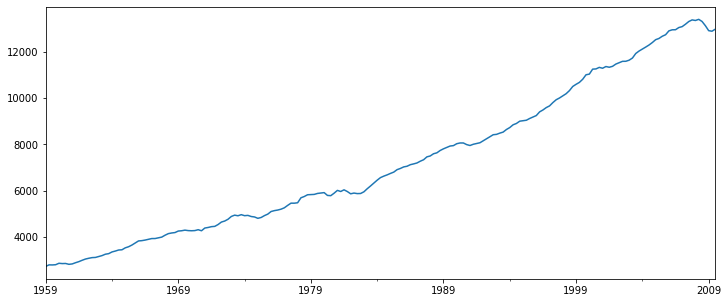

In [8]:
df["realgdp"].plot(figsize=(12,5))

# introduction to statsmodels library

In [10]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [12]:
gdp_cycle,gdp_trend=hpfilter(df['realgdp'],lamb=1600)

In [13]:
type(gdp_trend)

pandas.core.series.Series

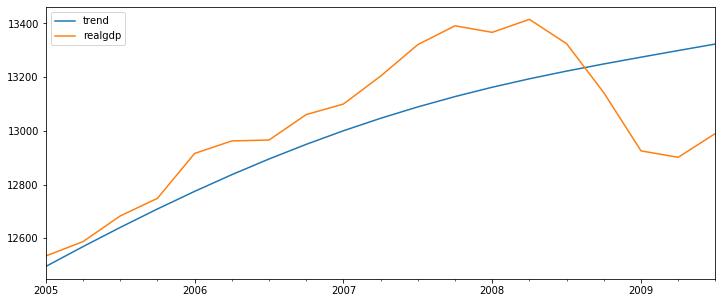

In [20]:
df["trend"]=gdp_trend
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

#(error trend seasonality) ETS decomposition

# ETS (error_trend_seasonality) model

In [70]:
airline=pd.read_csv('D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\airline_passengers.csv',
                   index_col=0,parse_dates=True)

In [71]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [72]:
airline1=airline.dropna()

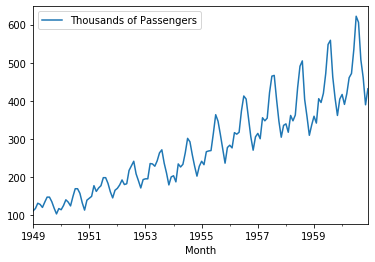

In [73]:
airline1.plot()

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
result=seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

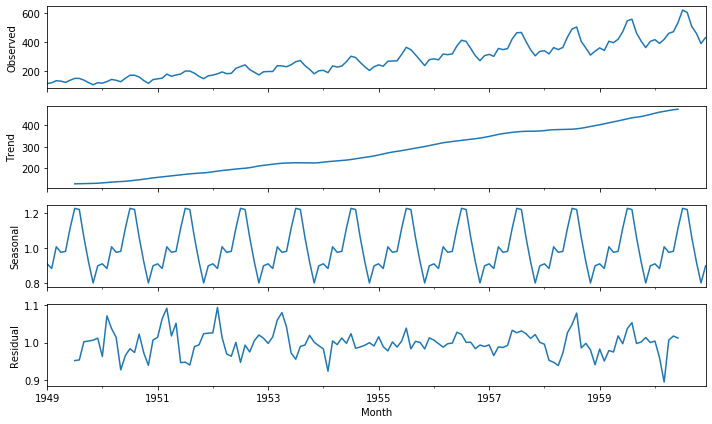

In [42]:
from pylab import rcParams
rcParams["figure.figsize"]=10,6

result.plot();

# EWMA (Exponentially weighted moving average) models

EWMA will put more weight on values that occured more recently ( by applying more weight to the more recent values)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
airline=pd.read_csv('D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\airline_passengers.csv',
                   index_col='Month',parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [87]:
airline1=airline.copy()
airline1.dropna(inplace=True)

In [88]:
airline1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [90]:
airline1["6-month-SMA"]=airline1["Thousands of Passengers"].rolling(window=6).mean()

In [91]:
airline1["12-month-SMA"]=airline1["Thousands of Passengers"].rolling(window=12).mean()

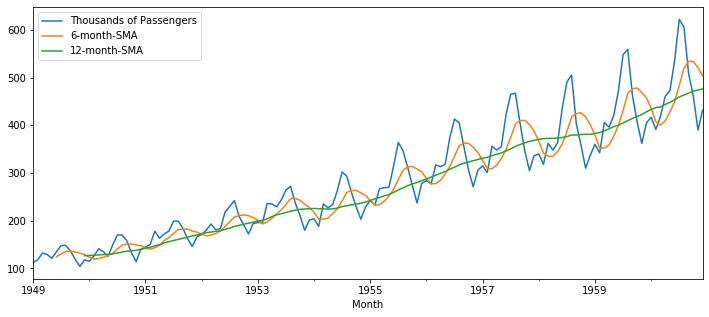

In [96]:
airline1.plot(figsize=(12,5))

In [104]:
airline1["EWMA-12"]=airline1["Thousands of Passengers"].ewm(span=12).mean()

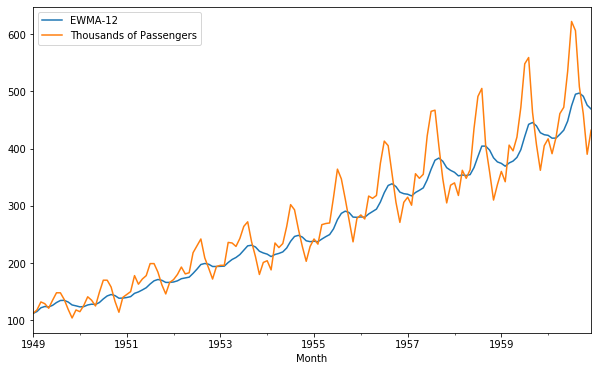

In [105]:
airline1[["EWMA-12","Thousands of Passengers"]].plot(figsize=(10,6))

# Holt-Winters Methods Theory

In [107]:
airline1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [113]:
airline1.index.freq='MS'
airline1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [126]:
df=airline1.copy()
df.drop(columns=["6-month-SMA",'12-month-SMA','EWMA-12'],inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [127]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [128]:
span=12
alpha=2/(span+1)

In [129]:
df['EWMA12']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [130]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [174]:
model=SimpleExpSmoothing(df["Thousands of Passengers"])

In [175]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [176]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [177]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237762,118.853687,118.853687
1949-02-01,118,112.923077,112.923077,120.237762,133.343675,133.343675
1949-03-01,132,115.857988,115.857988,134.237762,127.912641,127.912641
1949-04-01,129,117.879836,117.879836,131.237762,120.991626,120.991626
1949-05-01,121,118.359861,118.359861,123.237762,133.909434,133.909434


In [178]:
# run them in one command
# df['SES12']=SimpleExpSmoothing(df["Thousands of Passengers"]).fit(smoothing_level=alpha,optimized=False)..fittedvalues.shift(-1)

In [179]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [180]:
# remember to change the type of data into 'double'
model=ExponentialSmoothing(df["Thousands of Passengers"].astype('double'),trend='add')
df["DES_add_12"]=model.fit().fittedvalues.shift(-1)

In [181]:
# remember to change the type of data into 'double'
model=ExponentialSmoothing(df["Thousands of Passengers"].astype('double'),trend='mul')
df["DES_mul_12"]=model.fit().fittedvalues.shift(-1)

In [182]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

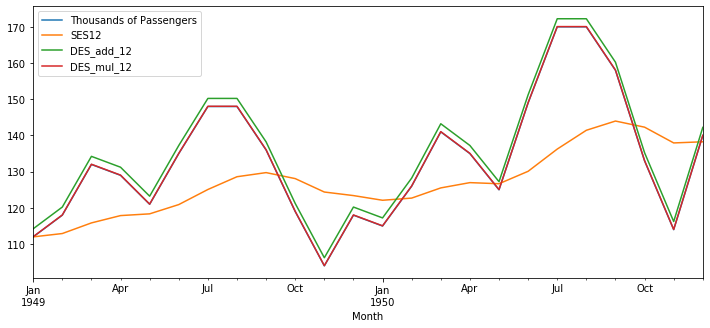

In [183]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [189]:
# remember to change the type of data into 'double'
model=ExponentialSmoothing(df["Thousands of Passengers"].astype('double'),trend='mul',seasonal='mul',seasonal_periods=12)
df["TES_mul_12"]=model.fit().fittedvalues.shift(-1)

In [190]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

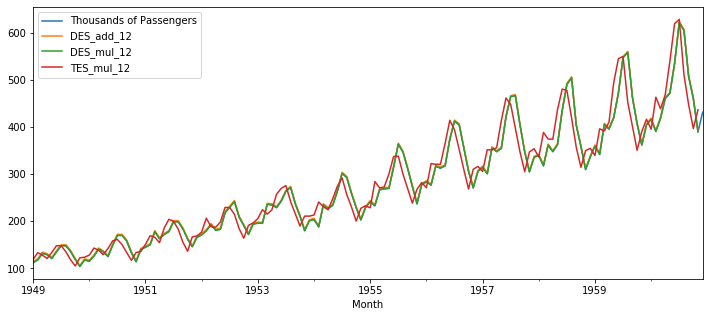

In [191]:
df[['Thousands of Passengers', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12']].plot(figsize=(12,5))